#**One-Class SVM versus using RBF Kernel ---VERSUS--- One-Class SVM using Stochastic Gradient Descent**

- Support Vector Machines (SVMs) are powerful supervised machine learning algorithms used for classification, regression, and outlier detection tasks.

- The primary objective of SVM is to find the optimal hyperplane that separates data points of different classes in an N-dimensional space. The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors.

## **Linear and Nonlinear SVM**

#####**Linear SVM**:
Used when data is linearly separable. The hyperplane is a straight line (in 2D) or a flat plane (in higher dimensions) that separates the classes.

#####**Nonlinear SVM:**
Used when data is not linearly separable. SVM uses kernel functions to transform the data into a higher-dimensional space where a linear hyperplane can be used to separate the classes. Common kernel functions include polynomial, radial basis function (RBF), and sigmoi

#####**One-class SVM**
is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.



####**The following code demonstrates and visualises the use of One-Class Support Vector Machines (SVM) for anomaly detection**.

Breakdown of what the code does:

- Two One-Class SVM models are trained: one standard and one using kernel approximation with SGD.

- The decision boundaries of both One-Class SVM models visualized alongside data points to demonstrate model performance in separating normal and abnormal observations.


###**1. Importing Necessary libraries**

In [403]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.svm import OneClassSVM

###**2. Setting Font Properties for the Plots**

In [404]:
font = {"weight": "normal", "size": 10.5}

matplotlib.rc("font", **font)

###**3. Generating Synthetic Data for Training the One-Class SVM Model (X_train data)**

In [405]:
##Initializing a random state for reproducibility.
random_state = 22

rng = np.random.RandomState(random_state)

#Then create an array of 500x2 (500 rows and 2 columns) with random numbers drawn from a standard normal distribution (mean 0, variance 1).
#These represent the base data points.
#Scale these random numbers by 0.3, making the clusters tighter. The variable X is assigned this scaled random data

X = 0.3 * rng.randn(500, 2)

#np.r_[] is used to stack arrays vertically. It takes the initial X data and adds 2 to each data point (shifting one cluster),
# subtracts 2 from each data point (shifting another cluster in the opposite direction),
# and adds another shifted cluster for a third cluster.
#This results in three distinct clusters of data points for training.

X_train = np.r_[X + 2, X - 2, X + [2, -2]]

# np.r_[] is a NumPy function used to stack arrays vertically (row-wise).
# X is the base data, which consists of points centered around (0, 0).
# X + 2: This shifts the base data by adding 2 to both the x and y coordinates, creating a cluster centered around (2, 2).
# X - 2: This shifts the base data by subtracting 2 from both the x and y coordinates, creating a cluster centered around (-2, -2).
# X + [2, -2]: This shifts the base data by adding 2 to the x-coordinate and subtracting 2 from the y-coordinate, creating a cluster centered around (2, -2).
# np.r_[X + 2, X - 2, X + [2, -2]]: This stacks these three shifted arrays vertically, combining them into a single array X_train that contains data points forming three distinct clusters.
#This line is crucial for generating the structured training data used to demonstrate the One-Class SVM's ability to learn the boundaries of these normal clusters.

###**4. Generating Some Regular Novel Observations(X_test data)**

In [406]:
#create an array of 20x2 (20 rows and 2 columns) with random numbers drawn from a standard normal distribution (mean 0, variance 1). These represent the base data points.
# then scale these random numbers by 0.3, making the clusters tighter. The variable X is assigned this scaled random data

X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2, X + [2, -2]]

###**5. Generating Some Abnormal Novel Observations(X_Outliers)**

In [407]:
#Creates an array of 20x2 (20 rows and 2 columns) with random numbers drawn from a uniform distribution between -4 and 4.
#This generates scattered data points within this range, which are intended to represent outliers or abnormal observations that are not part of the clusters generated earlier.
# These X_outliers will be used to test how well the trained One-Class SVM models identify these abnormal points.

X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

###**6.Defining the Hyperparameters for the One-Class SVM Model**

In [408]:
# DEFINING THE HYPERPARAMETERS FOR THE ONE-CLASS SVM MODEL
nu = 0.05

#In One-Class SVM, nu is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
#It controls the trade-off between the number of support vectors and the training errors.
#A smaller nu allows for more errors and potentially a tighter boundary around the normal data.

gamma = 2.0

#This sets the gamma hyperparameter for the RBF kernel. gamma defines how far the influence of a single training example reaches.
#A smaller gamma means a larger influence, and a larger gamma means a smaller influence.
#In the context of the RBF kernel, it affects the shape of the decision boundary.


###**7 a). Fitting the One-Class SVM Using the RBF Kernel**

In [409]:
clf = OneClassSVM(gamma=gamma, kernel="rbf", nu=nu)      # This initializes the standard OneClassSVM model with the specified gamma, nu, and using the Radial Basis Function ("rbf") kernel.
clf.fit(X_train)                                         # This fits the initialized OneClassSVM model to the training data (X_train).
                                                         # During this fitting process, the model learns the decision boundary that separates the normal data points from the rest of the space.

y_pred_train = clf.predict(X_train)
#This line uses the trained clf model to predict whether each data point in the training set (X_train) is an inlier (part of the normal data) or an outlier.
#The predictions are stored in y_pred_train, where 1 typically indicates an inlier and -1 indicates an outlier.

y_pred_test = clf.predict(X_test)
#Similar to the previous line, this makes predictions on the regular test data (X_test).
#Since these are expected to be regular observations, the model should ideally predict 1 for most of them.

y_pred_outliers = clf.predict(X_outliers)

#This makes predictions on the abnormal outlier data (X_outliers).
#Since these are expected to be outliers, the model should ideally predict -1 for most of them.

n_error_train = y_pred_train[y_pred_train == -1].size
#This calculates the number of errors in the training set. It counts how many data points in X_train were predicted as outliers (-1).

n_error_test = y_pred_test[y_pred_test == -1].size
#This calculates the number of errors in the regular test set.
#It counts how many data points in X_test (which are supposed to be regular) were predicted as outliers (-1).

n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

#This calculates the number of errors in the abnormal outlier set.
#It counts how many data points in X_outliers (which are supposed to be abnormal) were predicted as inliers (1).
#These error counts provide a measure of how well the standard One-Class SVM model is performing in identifying outliers on the different datasets.

###**7 b). Fitting the One-Class SVM Using a Kernel approximation and Stochastic Gradient Descent (SGD)**

In [410]:
#initializing a Nystroem transformer.
#The Nystroem method is a technique for approximating the kernel function, which can make training faster and more scalable for large datasets compared to using the full kernel matrix.
#It uses a subset of the training data to create a low-rank approximation of the kernel.

transform = Nystroem(gamma=gamma, random_state=random_state)

#initializing an SGD OneClassSVM model.
#This model uses Stochastic Gradient Descent (SGD) to train a linear One-Class SVM in the transformed feature space created by the kernel approximation.
#This is another technique to improve scalability.
#The parameters nu, shuffle, fit_intercept, random_state, and tol configure the SGD training process

clf_sgd = SGDOneClassSVM(
    nu=nu, shuffle=True, fit_intercept=True, random_state=random_state, tol=1e-4
)


# Creating a pipeline that chains the Nystroem transformation and the SGD One-Class SVM model.
#When the pipeline is fitted, the data first goes through the Nystroem transformer, and then the transformed data is used to train the SGDOneClassSVM.
pipe_sgd = make_pipeline(transform, clf_sgd)


pipe_sgd.fit(X_train) #Fitting the pipeline to the training data (X_train)


#Using the trained SGD pipeline (pipe_sgd) to make predictions on the training, regular test, and outlier datasets, similar to the standard One-Class SVM predictions.
y_pred_train_sgd = pipe_sgd.predict(X_train)
y_pred_test_sgd = pipe_sgd.predict(X_test)
y_pred_outliers_sgd = pipe_sgd.predict(X_outliers)



#calculating  the number of errors for the predictions made by the SGD pipeline on each dataset,
#similar to the error calculations for the standard One-Class SVM.
n_error_train_sgd = y_pred_train_sgd[y_pred_train_sgd == -1].size
n_error_test_sgd = y_pred_test_sgd[y_pred_test_sgd == -1].size
n_error_outliers_sgd = y_pred_outliers_sgd[y_pred_outliers_sgd == 1].size

###**8a) Visualization of the decision boundary of the standard One-Class SVM (Using the RBF Kernel)**

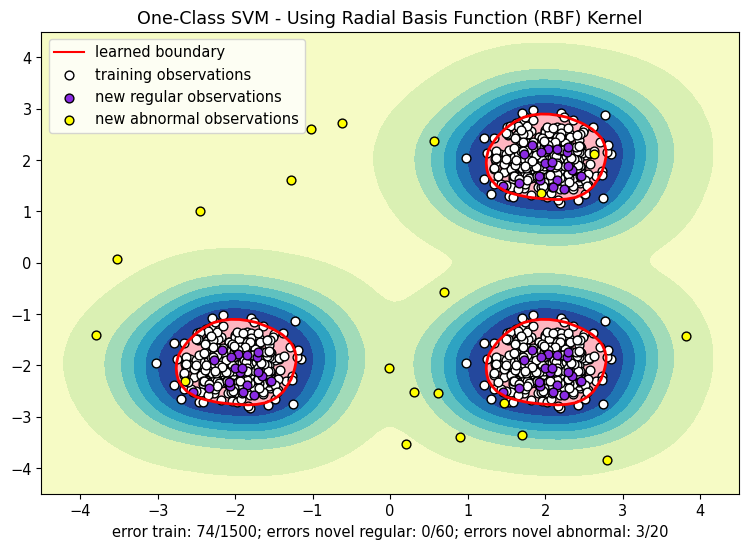

In [411]:
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots(figsize=(9, 6))

#CREATING A GRID THAT COVERS THE AREA OF THE PLOT

#The grid is used to evaluate the decision function of the One-Class SVM over the entire space, allowing for the plotting of contours.

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))

#This creates a grid of points over the specified range (-4.5 to 4.5 on both x and y axes). np.linspace generates 50 evenly spaced values between -4.5 and 4.5 for both the x and y dimensions.
#np.meshgrid then takes these 1D arrays and creates 2D arrays (xx and yy) where each point in the grid has a corresponding x and y coordinate.


X = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)

# This part reshapes the 2D grid points into a 2D array suitable for input to the DecisionBoundaryDisplay.
#  xx.ravel() and yy.ravel() flatten the 2D xx and yy arrays into 1D arrays.
# .reshape(-1, 1) reshapes these 1D arrays into columns (a 2D array with one column).
# np.concatenate(..., axis=1) concatenates these two column arrays horizontally, creating a new 2D array X where each row represents a point in the grid (x, y).



#USING THE DecisionBoundaryDisplay class TO PLOT THE DECISION FUNCTION
#AND THE DECISOION BOUNDARY OF THE STANDARD ONE-CLASS SVM (clf).

DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",  # response_method="decision_function" tells the DecisionBoundaryDisplay to use the decision_function method of the estimator (clf) to get the values for plotting
    plot_method="contourf",               # generating a filled contour plot (plot_method="contourf") representing the values of the decision function across the grid.
    ax=ax,                                # ax=ax indicates that the plot should be drawn on the specified axes object.
    cmap="YlGnBu",                        # The cmap="YlGnBu" sets the color map.
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,                           # drawing a contour line (plot_method="contour") specifically at the level 0. This line represents the learned decision boundary that separates the normal region from the anomaly region.
    linewidths=2,                    # This line represents the learned decision boundary that separates the normal region from the anomaly region.
    colors="red",                # It is styled with a red color and a linewidth of 2.
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,                         # creating another filled contour plot, highlighting the region considered "normal" by the model (where the decision function is greater than or equal to 0).
    colors="lightpink",
    levels=[0, clf.decision_function(X).max()],
)

s = 40                               #Setting the size of the markers for the scatter plots.

#PLOTTING THE ACTUAL DATA POINTS ON THE AXES
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")     #plotting the training data (X_train) as white circles with black edges.
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")  #plotting the regular novel observations (X_test) as blueviolet circles with black edges.
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="yellow", s=s, edgecolors="k") # plot the abnormal novel observations (X_outliers) as yellow circles with black edges.


ax.set(                             # Setting various properties of the axes, including the title, x and y limits, and the xlabel. The xlabel displays the error counts calculated earlier for each dataset.
    title="One-Class SVM - Using Radial Basis Function (RBF) Kernel",
    xlim=(-4.5, 4.5),
    ylim=(-4.5, 4.5),


    xlabel=(                         #The xlabel displays the error counts calculated earlier for each dataset.
        f"error train: {n_error_train}/{X_train.shape[0]}; "
        f"errors novel regular: {n_error_test}/{X_test.shape[0]}; "
        f"errors novel abnormal: {n_error_outliers}/{X_outliers.shape[0]}"
    ),
)
_ = ax.legend(
    [mlines.Line2D([], [], color="red", label="learned boundary"), b1, b2, c],
    [
        "learned boundary",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)

###**8b) Visualization of the decision boundary of the One-Class SVM (Using the Stochastic Gradient Desecent Approximation)**

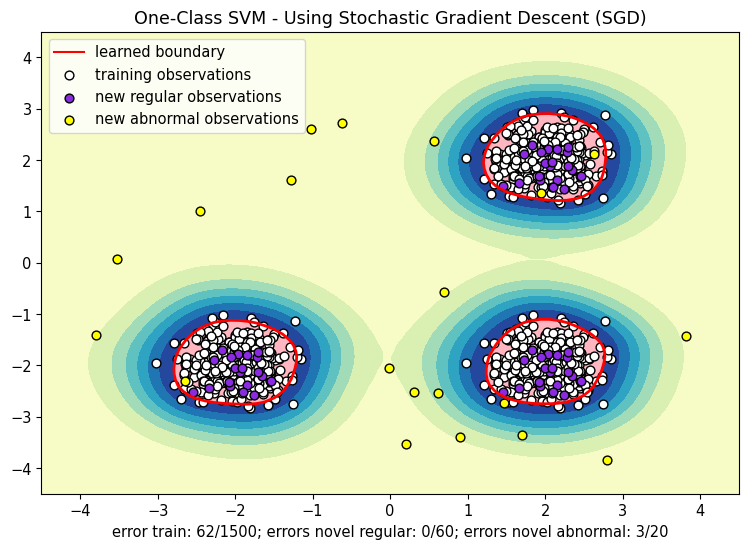

In [412]:
_, ax = plt.subplots(figsize=(9, 6))

xx, yy = np.meshgrid(np.linspace(-4.5, 4.5, 50), np.linspace(-4.5, 4.5, 50))
X = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="YlGnBu",
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    linewidths=2,
    colors="red",
    levels=[0],
)
DecisionBoundaryDisplay.from_estimator(
    pipe_sgd,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    colors="lightpink",
    levels=[0, pipe_sgd.decision_function(X).max()],
)

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="yellow", s=s, edgecolors="k")

ax.set(
    title="One-Class SVM - Using Stochastic Gradient Descent (SGD)",
    xlim=(-4.5, 4.5),
    ylim=(-4.5, 4.5),
    xlabel=(
        f"error train: {n_error_train_sgd}/{X_train.shape[0]}; "
        f"errors novel regular: {n_error_test_sgd}/{X_test.shape[0]}; "
        f"errors novel abnormal: {n_error_outliers_sgd}/{X_outliers.shape[0]}"
    ),
)
ax.legend(
    [mlines.Line2D([], [], color="red", label="learned boundary"), b1, b2, c],
    [
        "learned boundary",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
)
plt.show()


# **Analysis**

Based on the error counts shown in the outputs of the previous cells, we can compare the performance of the two One-Class SVM approaches:

###**Standard One-Class SVM (RBF Kernel):**
- Errors on training data: 74/1500
- Errors on novel regular data: 0/60
- Errors on novel abnormal data: 3/20

###**One-Class SVM (SGD Approximation):**
- Errors on training data: 62/1500
- Errors on novel regular data: 0/60
- Errors on novel abnormal data:3/20

Looking at these numbers:

- Both models performed equally well on the novel regular data, with 0 errors.
- Both models performed equally well on the novel abnormal data, misclassifying only 3 out of 20 outliers.
- The SGD approximation approach had fewer errors on the training data (62 vs 74).


Based solely on these error counts on this specific synthetic dataset, the One-Class SVM with the SGD approximation appears to perform slightly better in terms of fitting the training data with fewer errors, while both models are equally effective at identifying novel regular and abnormal observations.

It's important to note that on a real-world dataset, the performance difference might be more pronounced, and factors like training time and scalability would also be important considerations when choosing between these two approaches.